###### Tasks:

1. Parse info.out files to determine what happened to which planets and when. Chart as a function of time
2. Reading in an ensemble of planetary systems data. Initial and final times, initial vs final semi-major axis distribution (only need to parse first and last lines of file- would throw out planets that die)


Two ideas for how to expand your code to apply to more questions:
1. First, I would encourage you to expand your "fates parsing" routine to record the planet numbers of each fate in each system, as well as the time that each of those planets was lost. I would also recommend that you use the same keys for the planets/runs as you do for the simulation loading so you can access both dictionaries using one key strategy.
2. Second, I would encourage you to think about how to record all the initial/final conditions for a planet (instead of just semimajor axis). You could do this by using your cols list in a for loop and saving each element as a new element in the dictionary or by having your dictionary "flipped" and saving the first line and the last line as different keys instead of saving the time and semimajor axis as your keys.

Then, there are several plots that I think would give you useful skills that I don't think we've done before:
1. One plot that might be fun is a scatter plot of initial vs final semimajor axis for each planet (two options: colored by fate/last timestep in the simulation or for only the surviving planets). Skills: scatter plots and coloring/masking by a third variable
2. Another plot could be a histograms of initial and 10Myr semimajor axis distributions. Skills: histograms and data masking
3. A challenge plot could be plotting the mean initial and final semimajor axis for each system with error bars on each point representing the minimum/maximum values (or for extra challenge, the 10th and 90th percentiles). In my imagining of this plot, the x-axis would be run number and the y-axis would be semimajor axis, with two points along each x location for initial and final. Skills: Data aggregation and manipulation, error bars
4. Another challenge plot if you record all of the elements could be initial pericenter distance vs final pericenter distance colored by fate. Remember that pericenter is a*(1-e). Skills: Data aggregation and manipulation

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab

data = dict()
cols = ['Time','mass','a','e','i','omega','Omega','M','dist_jac','dist_cen','x','y','z','u','v','w']

for run in range (1,101):
    data[run] = dict()
    for sample in range(1,11):
        data[run][sample] = dict()
        planet = pd.read_csv(r'/Users/neha/Documents/lanl/hundred all/run'+str(run)+'/PL'+str(sample)+'.el', skiprows=2, delimiter=r"\s+", names=cols) 
        for col in cols:
            data[run][sample][col] = dict()
            # data[run][sample][col] = [planet[col][0], planet[col][-1]]
            data[run][sample][col] = [planet[col][0], planet[col][len(planet[col]) - 1]]
            # print(data[run][sample][col])

In [27]:
# said to use same dictionary keys, but bc of different sizes/formatting, caused an error when calling 
# data[run][something that wasn't in the original dictionary], but in the second one

data2 = dict()

for run in range (1,101):
    numPlanets = 10
    data2[run] = dict()
    data2[run]['time'] = [0]
    data2[run]['planets remaining'] = [numPlanets]
    data2[run]['ejected'] = []
    data2[run]['ejected times'] = []
    data2[run]['central body collision'] = []
    data2[run]['central body collision times'] = []
    data2[run]['planet-planet collision'] = []
    data2[run]['planet-planet collision times'] = []
    
    with open('/Users/neha/Documents/lanl/hundred all/run'+str(run)+'/info.out', 'r') as file:
        lines = file.readlines()
        for line in lines:
            if "PL" in line:
                cols = line.split()
                if "ejected" in line:
                    data2[run]['time'].append(float(cols[3]))
                    numPlanets -= 1
                    data2[run]['planets remaining'].append(numPlanets)
                    data2[run]['ejected'].append(cols[0])
                    data2[run]['ejected times'].append(cols[3])
                elif "collided with the central body" in line:
                    data2[run]['time'].append(float(cols[7]))
                    numPlanets -= 1
                    data2[run]['planets remaining'].append(numPlanets)
                    data2[run]['central body collision'].append(cols[0])
                    data2[run]['central body collision times'].append(cols[7])
                elif "was hit by" in line:
                    data2[run]['time'].append(float(cols[6]))
                    numPlanets -= 1
                    data2[run]['planets remaining'].append(numPlanets)
                    data2[run]['planet-planet collision'].append(cols[0])
                    data2[run]['planet-planet collision times'].append(cols[6])
                else:
                    print(cols)
        # data[run]['planets remaining'] = numPlanets

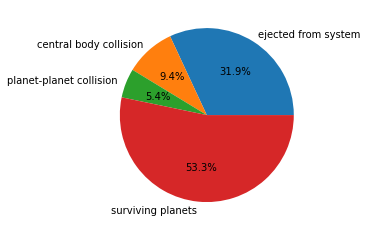

In [28]:
# pie chart of all planet fates
# had to re-do fates here because it wouldn't let me use multiple arrays for the plt.pie command

labels = ["ejected from system", "central body collision", "planet-planet collision", "surviving planets"]
fates = [0, 0, 0, 0]


for i in range(1, 101):
    run = data2[i]

    fates[0] += len(run['ejected'])
    fates[1] += len(run['central body collision'])
    fates[2] += len(run['planet-planet collision'])
    fates[3] += len(run['planets remaining'])
    

plt.figure()
plt.pie(fates, labels=labels, autopct='%1.1f%%')
plt.show()

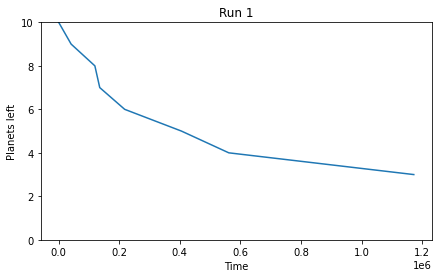

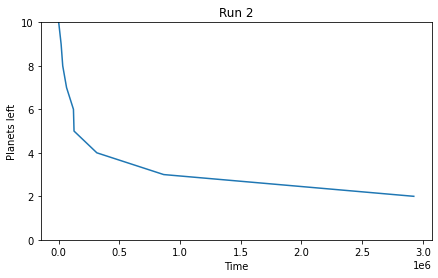

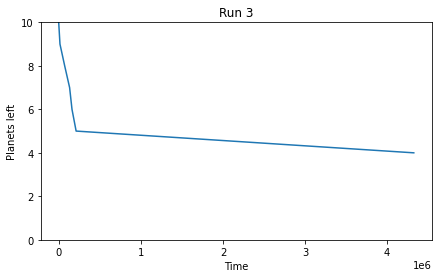

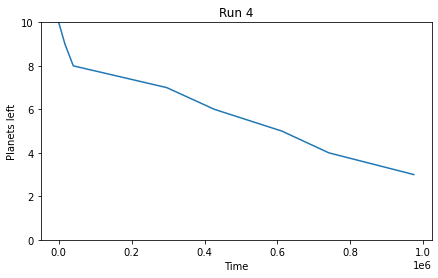

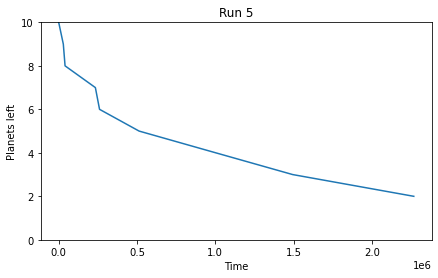

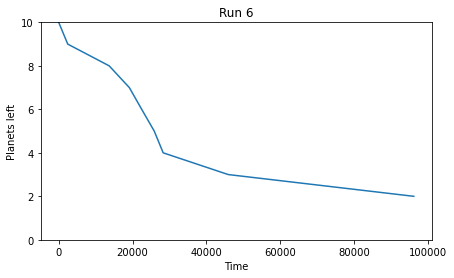

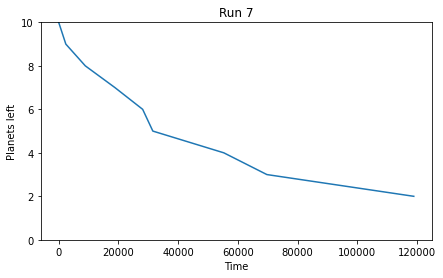

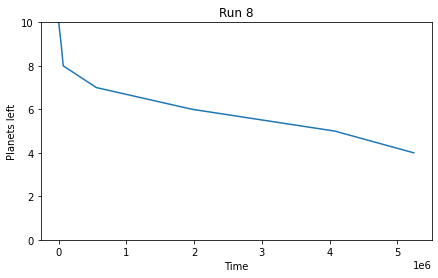

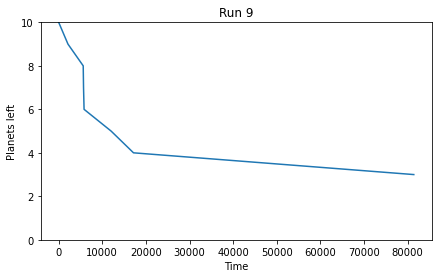

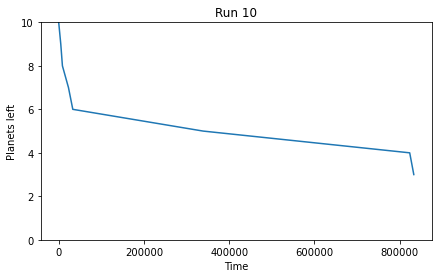

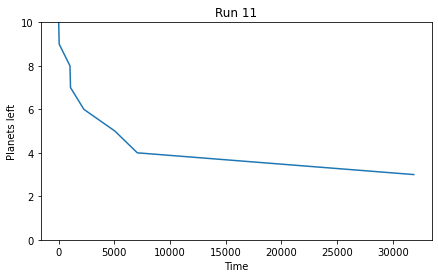

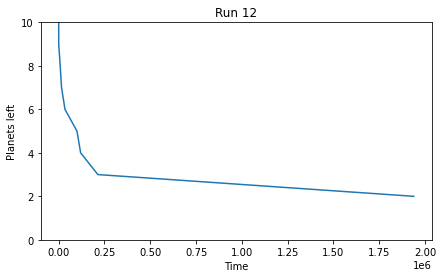

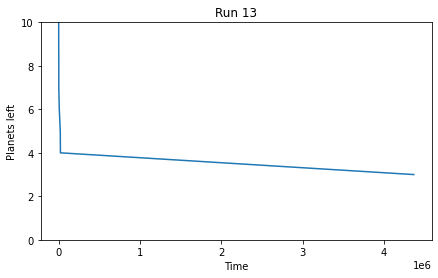

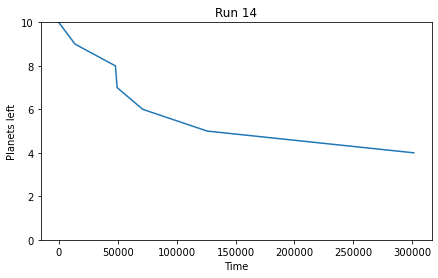

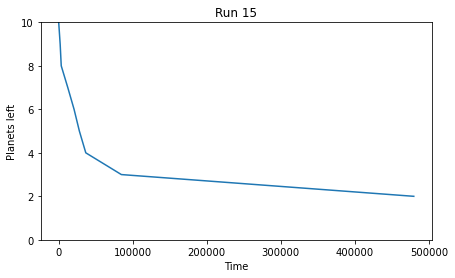

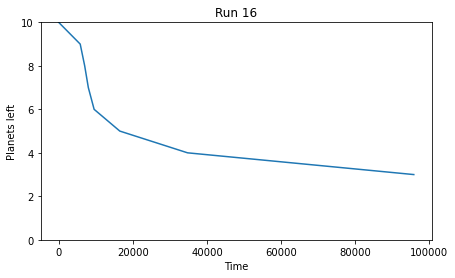

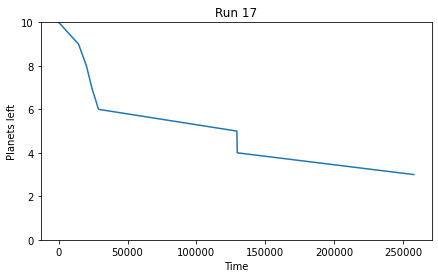

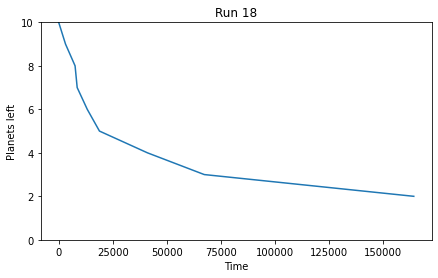

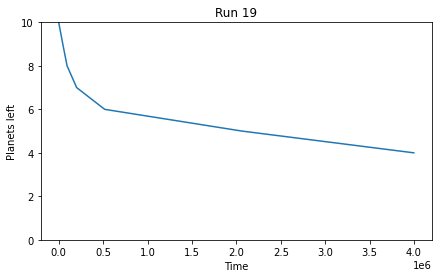

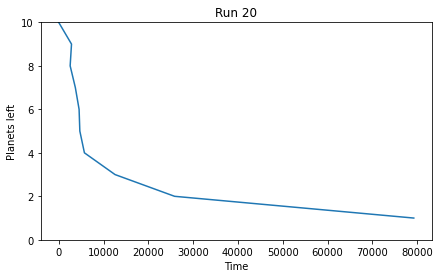

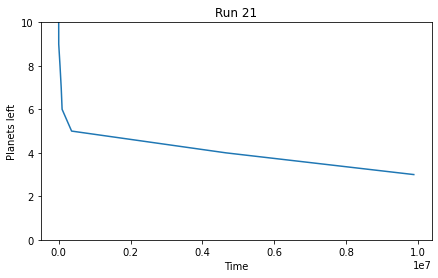

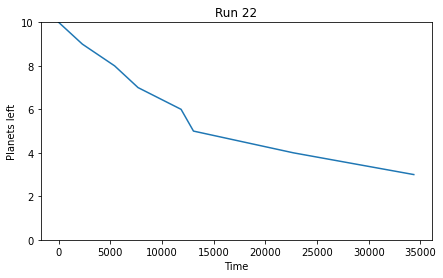

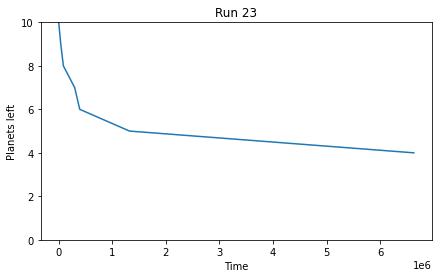

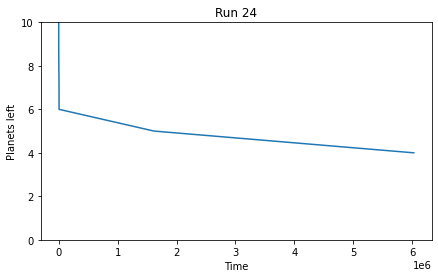

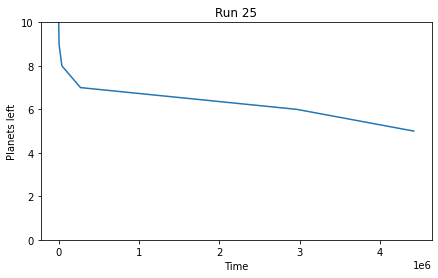

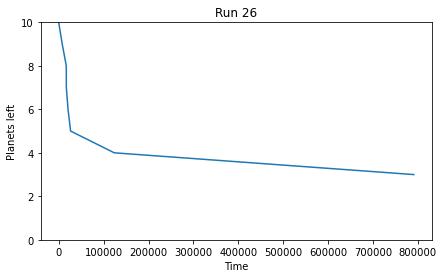

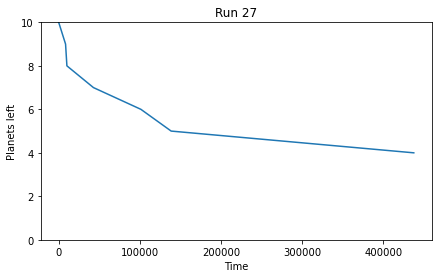

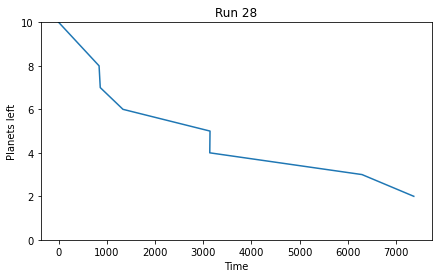

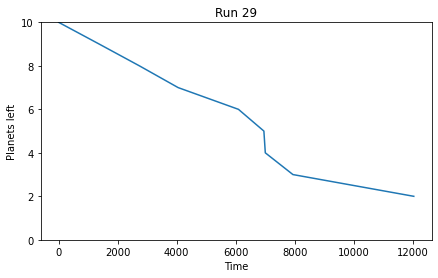

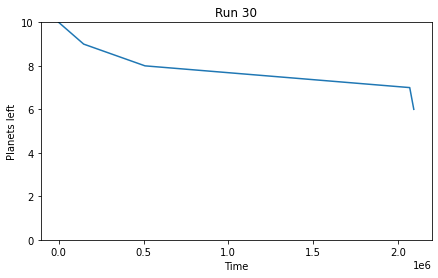

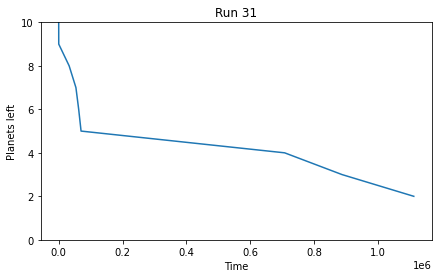

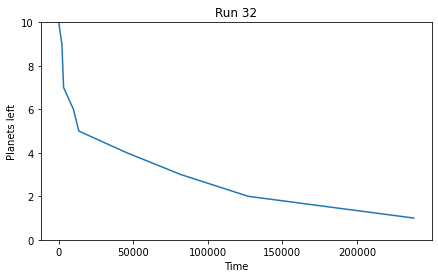

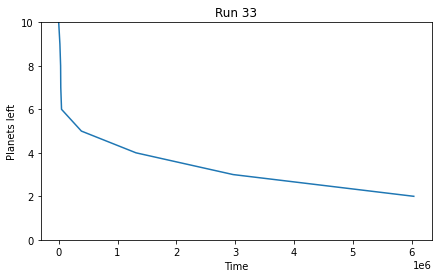

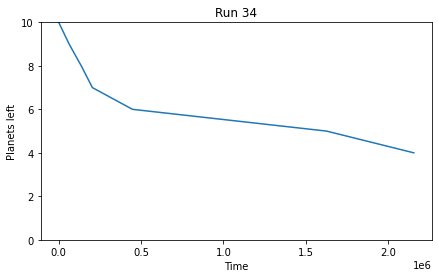

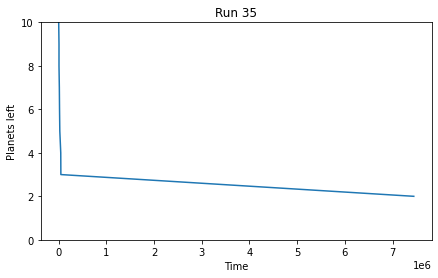

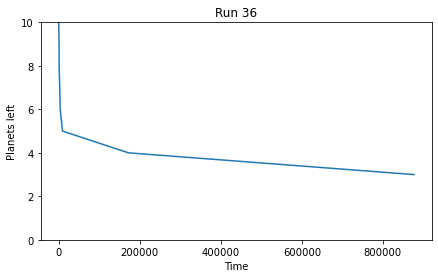

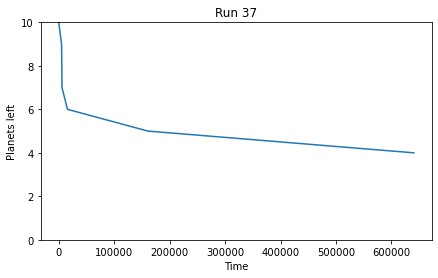

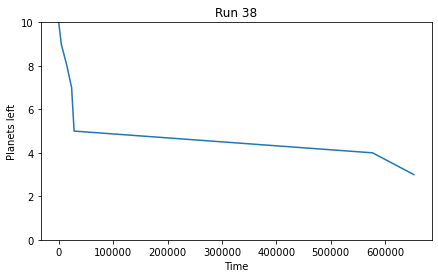

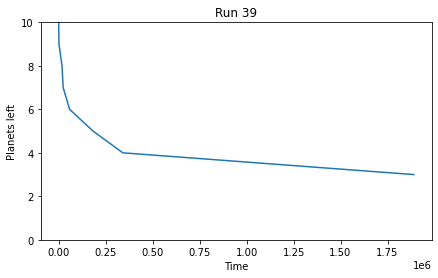

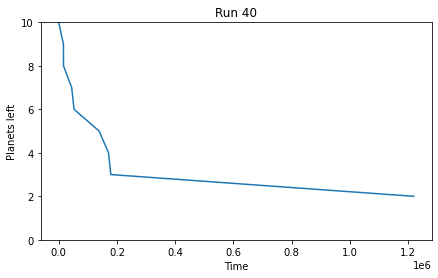

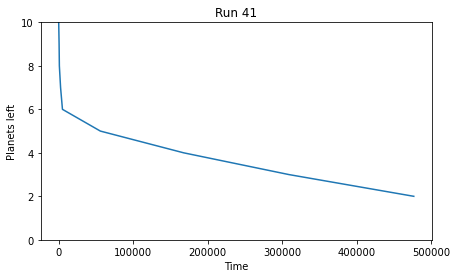

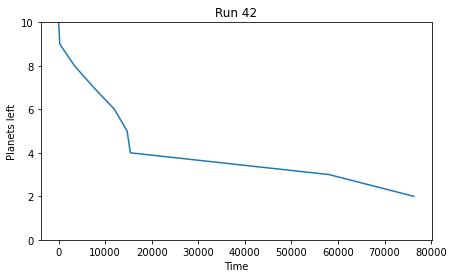

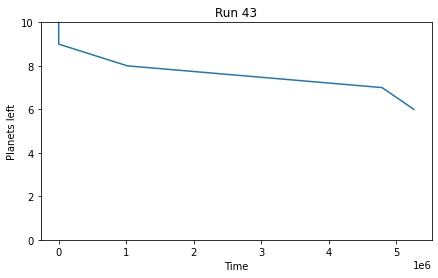

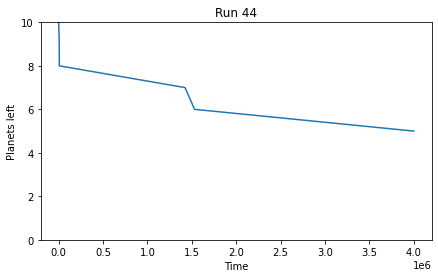

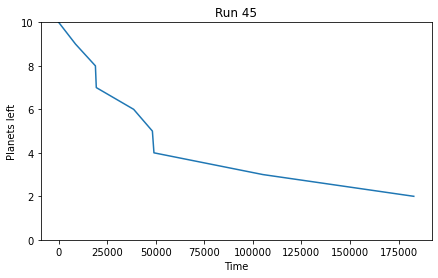

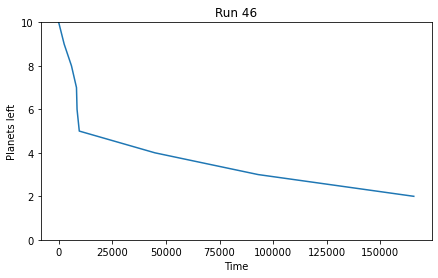

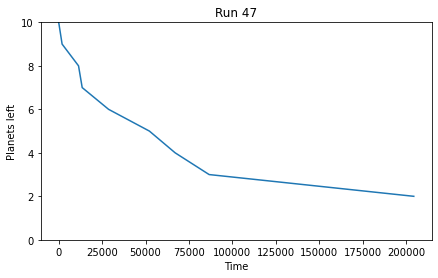

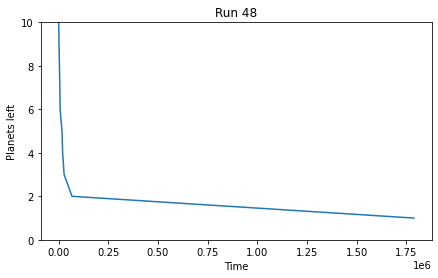

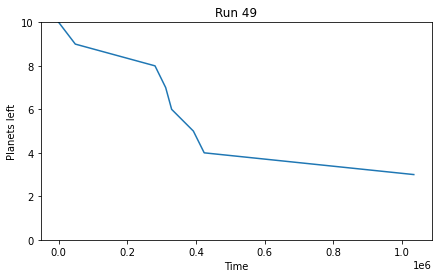

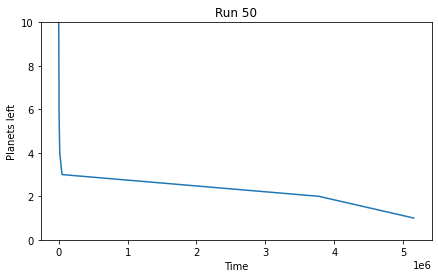

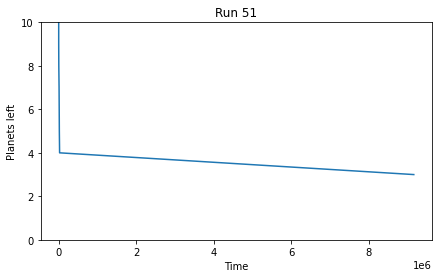

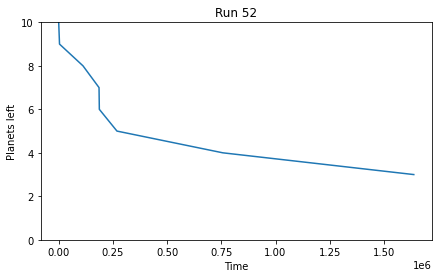

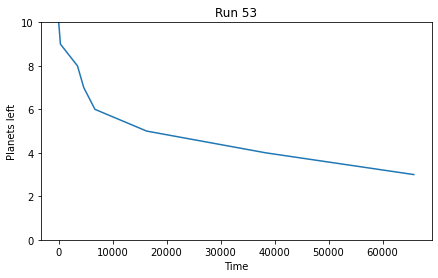

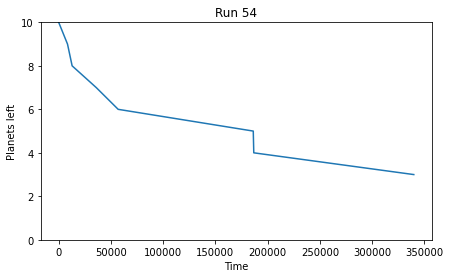

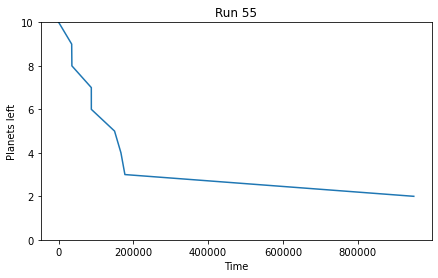

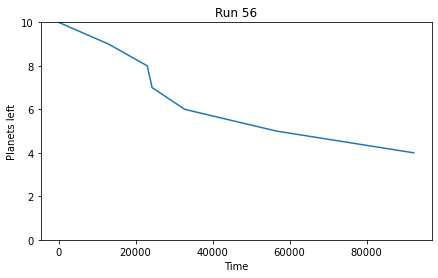

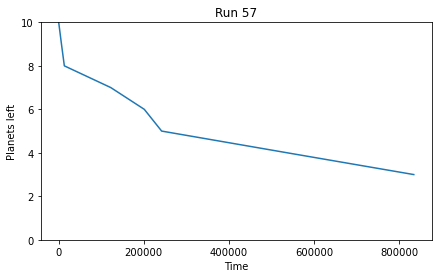

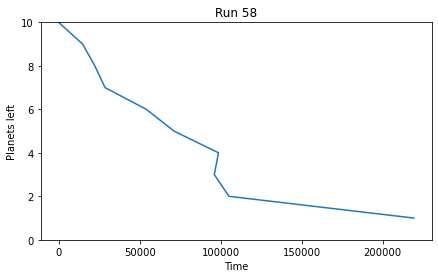

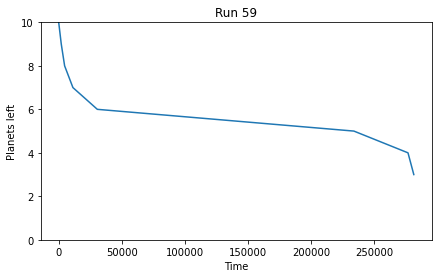

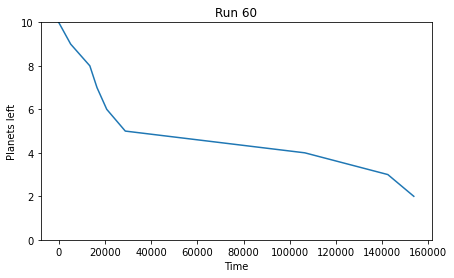

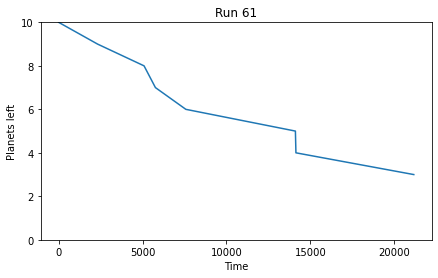

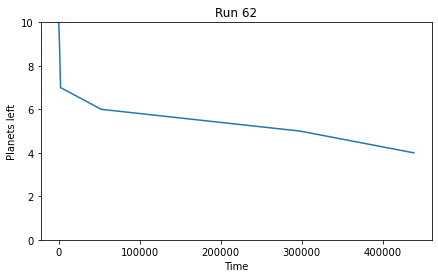

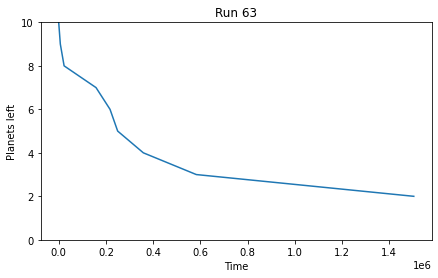

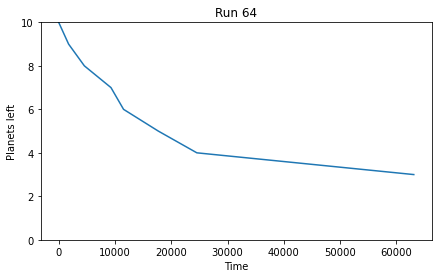

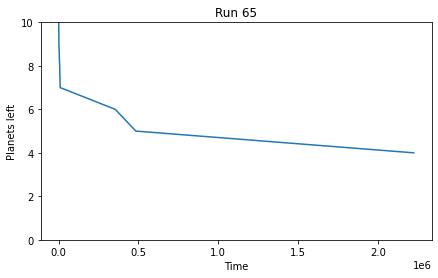

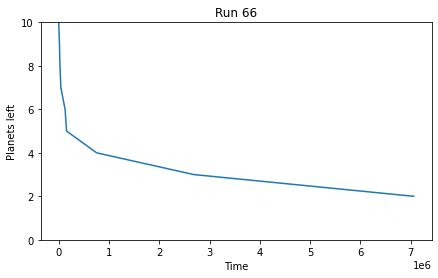

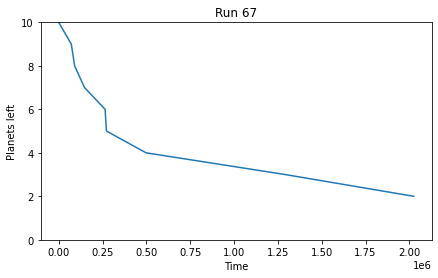

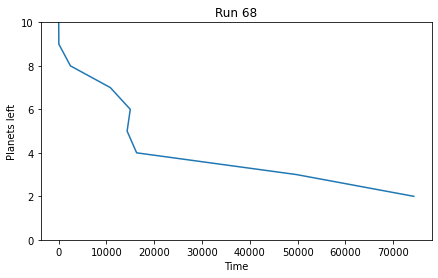

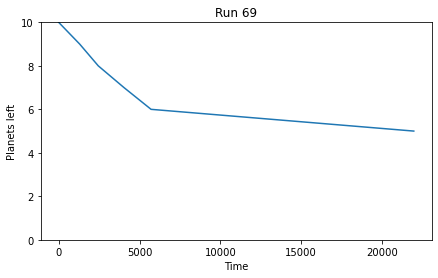

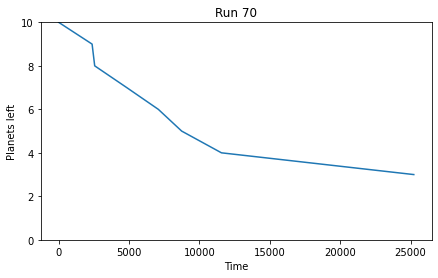

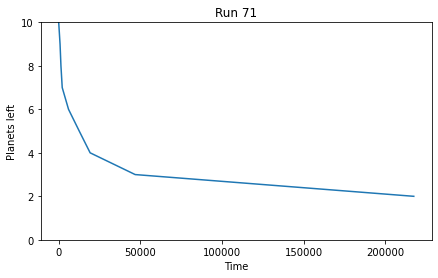

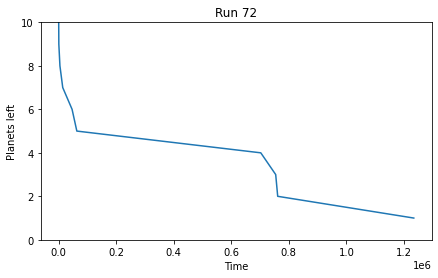

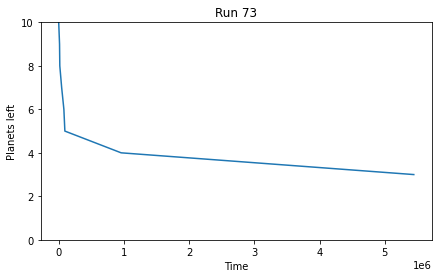

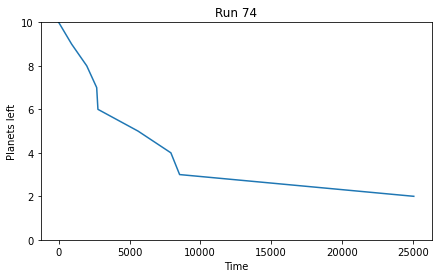

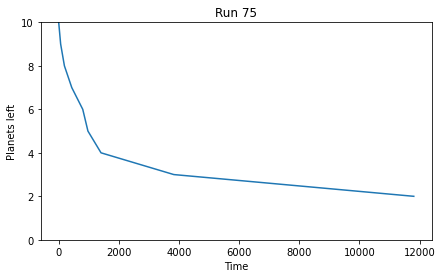

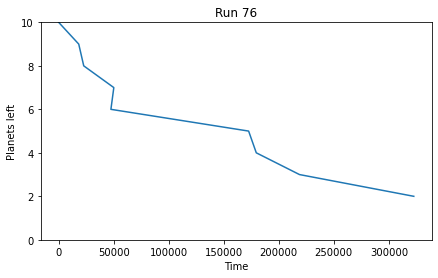

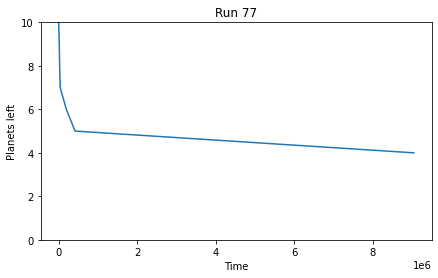

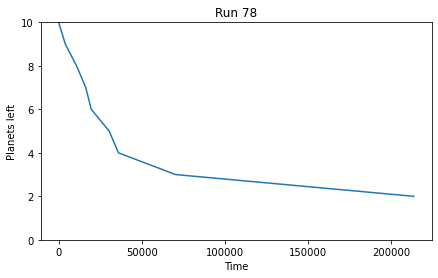

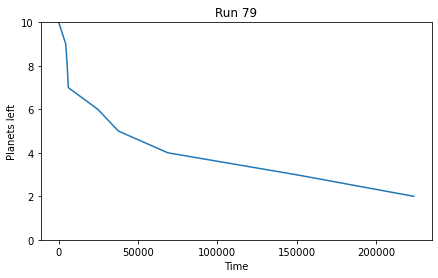

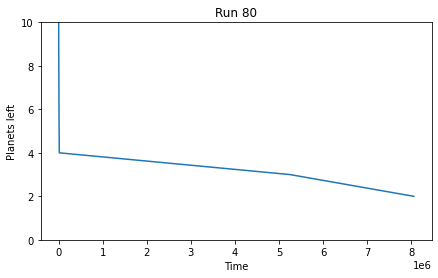

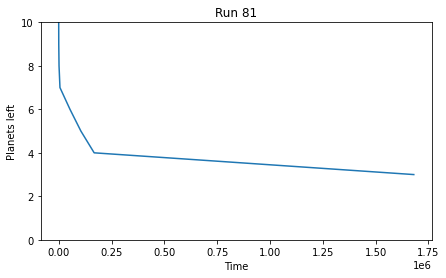

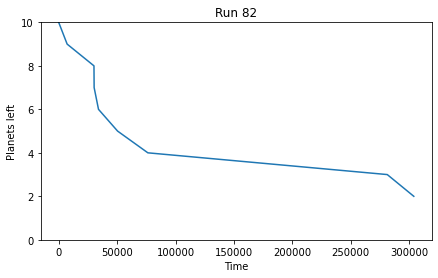

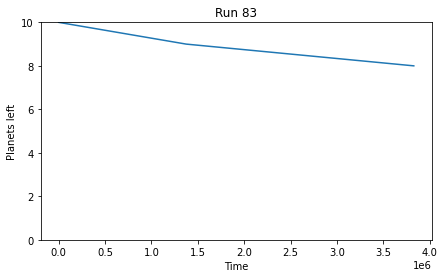

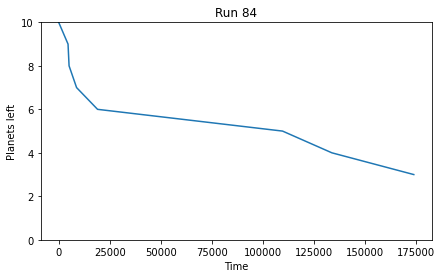

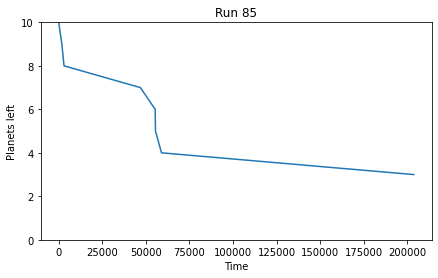

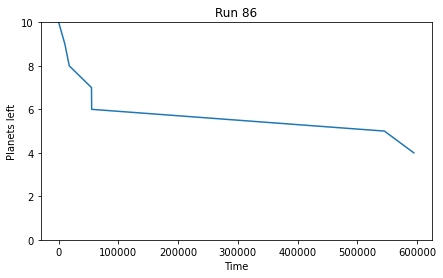

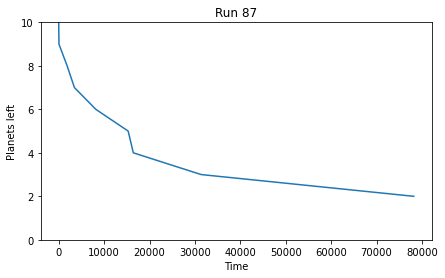

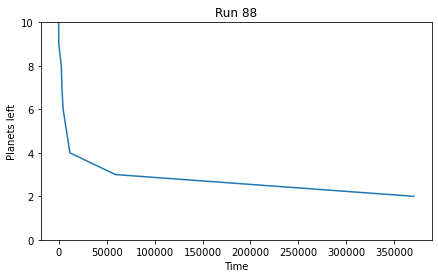

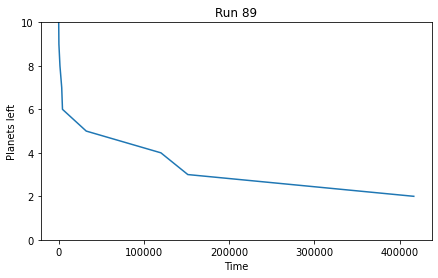

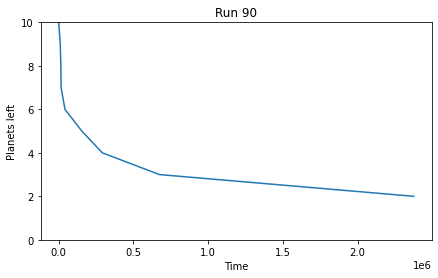

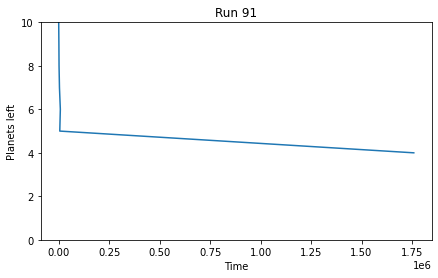

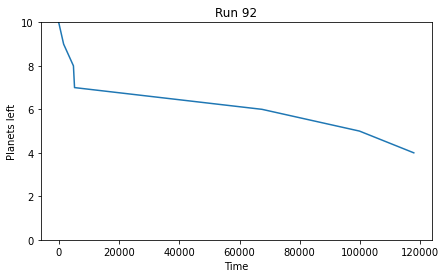

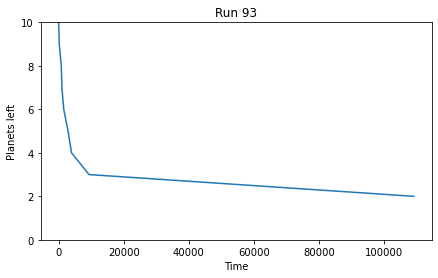

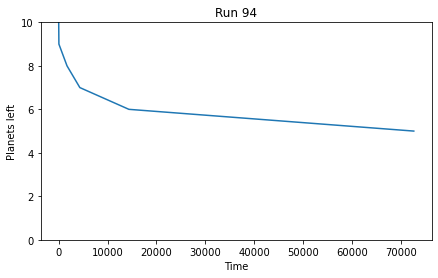

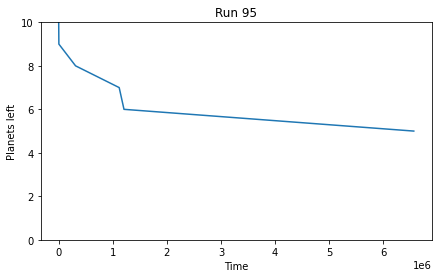

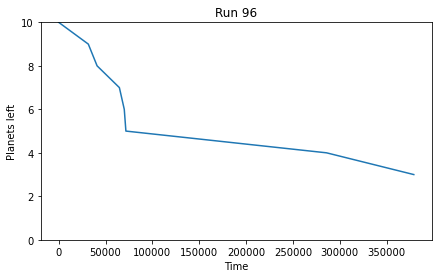

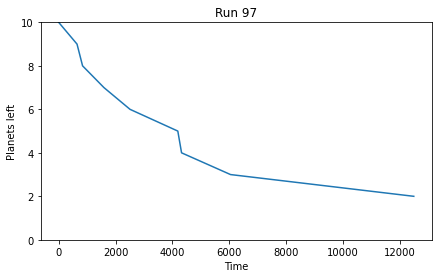

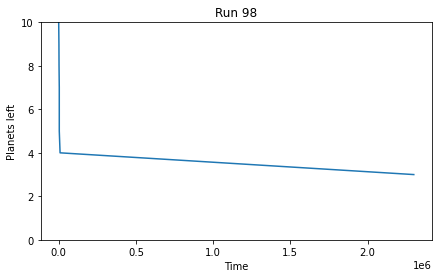

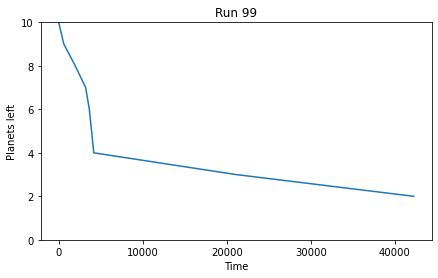

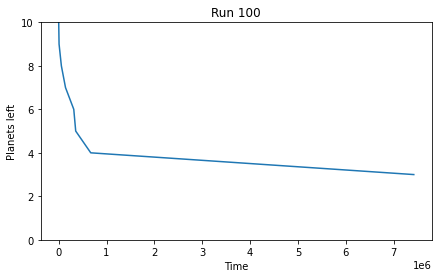

In [29]:
import numpy as np

# plot per run

for i in range(1, 101):
    run = data2[i]
    f = plt.figure(figsize=(7,4))
    
    plt.xlabel('Time')
    plt.ylabel('Planets left')
    plt.title('Run ' + str(i))
    plt.ylim(0,10)
    
    plt.plot(run['time'], run['planets remaining'])
    plt.show()
    
    # plt.savefig('run' + str(i) + '.png')
    # plt.close

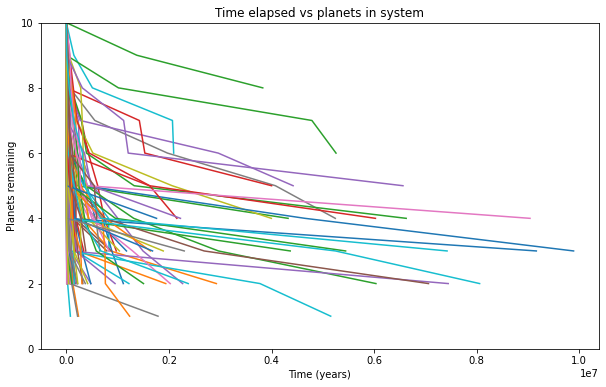

In [30]:
import numpy as np

# overlayed plots

f=plt.figure(figsize=(10,6))

for i in range(1, 101):
    run = data2[i]
    
    plt.xlabel('Time (years)')
    plt.ylabel('Planets remaining')
    plt.title('Time elapsed vs planets in system')
    plt.ylim(0,10)
    
    plt.plot(run['time'], run['planets remaining'])
    
    # plt.savefig('run' + str(i) + '.png')
    # plt.close
    
plt.show()

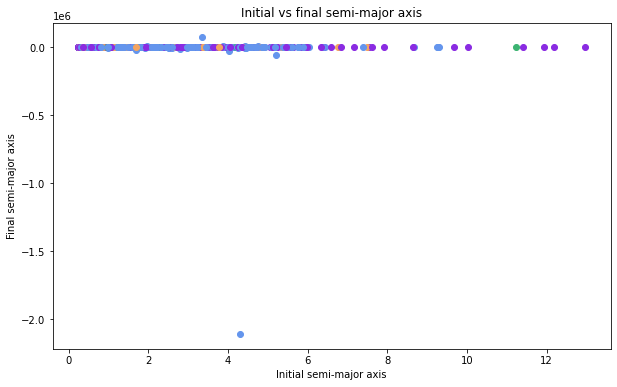

In [31]:
# plotting initial vs final semi-major axis, masked by color for different planet fates

f=plt.figure(figsize=(10,6))

for run in range (1,101):
    for sample in range(1,11):
        pl = 'PL' + str(sample)
        a0 = data[run][sample]['a'][0]
        a1 = data[run][sample]['a'][1]
        
        if (pl in data2[run]['ejected']):
            plt.scatter(a0, a1, color = 'cornflowerblue') # ejected
        elif (pl in data2[run]['central body collision']):
            plt.scatter(a0, a1, color = 'sandybrown') # central
        elif (pl in data2[run]['planet-planet collision']):
            plt.scatter(a0, a1, color = 'mediumseagreen') # planet-planet
        else:
            plt.scatter(a0, a1, color = 'blueviolet') # remaining
            
plt.ylabel('Final semi-major axis')
plt.xlabel('Initial semi-major axis')
plt.title('Initial vs final semi-major axis')
plt.show()

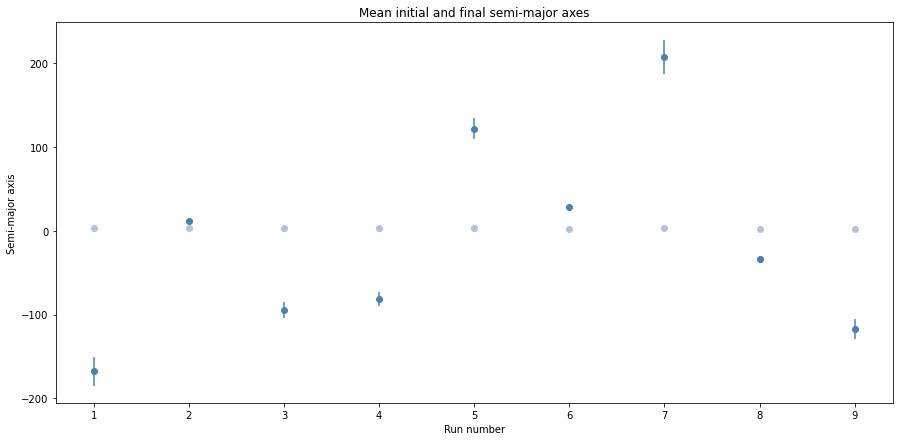

In [59]:
# plotting mean initial and final semi-major axis per run with error bars

f=plt.figure(figsize=(15,7))

for run in range (1,10):
    for sample in range(1,11):
        pl = 'PL' + str(sample)
        a0 += data[run][sample]['a'][0]
        a1 += data[run][sample]['a'][1]
        
    a0 /= 10
    a1 /= 10
    
    # dont think there's a way to do uneven error bars so how would you do 10/90th percentiles or min/max values
    err0 = 0.1*a0
    err1 = 0.1*a1
    
    plt.errorbar(run, a0, yerr = err0, fmt = '-o', color = 'lightsteelblue')
    plt.errorbar(run, a1, yerr = err1, fmt = '-o', color = 'steelblue')

            
plt.ylabel('Semi-major axis')
plt.xlabel('Run number')
plt.title('Mean initial and final semi-major axes')
plt.show()

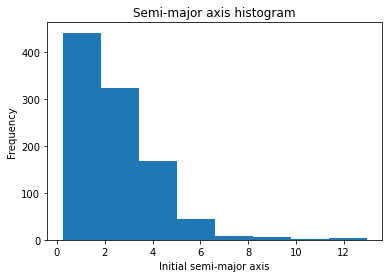

In [81]:
# histogram of initial vs final semi-major axis distributions

import matplotlib.mlab as mlab

x = []
y = []
for run in range (1,101):
    for sample in range(1,11):
        pl = 'PL' + str(sample)
        x.append(data[run][sample]['a'][0])
        y.append(data[run][sample]['a'][1])
        
plt.hist(x, bins=8)

plt.xlabel('Initial semi-major axis')
plt.ylabel('Frequency')
plt.title('Semi-major axis histogram')
plt.show()

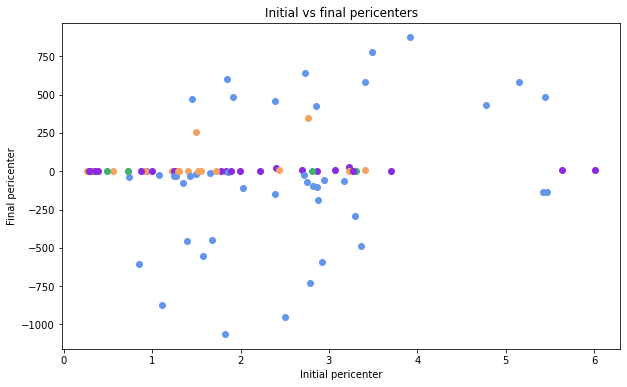

In [33]:
# plotting initial vs final pericenter, masked by color for different planet fates

f=plt.figure(figsize=(10,6))

for run in range (1,10):
    for sample in range(1,11):
        pl = 'PL' + str(sample)
        a0 = data[run][sample]['a'][0]
        a1 = data[run][sample]['a'][1]
        e0 = data[run][sample]['e'][0]
        e1 = data[run][sample]['e'][1]
        
        if (pl in data2[run]['ejected']):
            plt.scatter(a0*(1-e0), a1*(1-e0), color = 'cornflowerblue') # ejected
        elif (pl in data2[run]['central body collision']):
            plt.scatter(a0*(1-e0), a1*(1-e0), color = 'sandybrown') # central
        elif (pl in data2[run]['planet-planet collision']):
            plt.scatter(a0*(1-e0), a1*(1-e0), color = 'mediumseagreen') # planet-planet
        else:
            plt.scatter(a0*(1-e0), a1*(1-e0), color = 'blueviolet') # remaining
            
plt.ylabel('Final pericenter')
plt.xlabel('Initial pericenter')
plt.title('Initial vs final pericenters')
plt.show()